In [1]:
# import the dependencies 

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np


In [2]:
# create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-71.10894811810904 33.16350998064783
-18.076965222752932 -112.8854775918587
-37.817974449462746 2.367622526077156
37.949054774921024 -49.420142526549654
10.326455932697243 -142.8065158895681
-31.14013941021232 118.97892890010928
-57.15456947553554 64.14377650475936
-83.3069822812516 169.22643793580272
-73.9509186730771 -167.09432496310114
3.85544369912796 -82.91077269928743
24.71635099743996 -113.17228523594926
63.169438216127645 -113.6268572174564
-52.15836888425341 108.08879543382432
76.41591838028975 -117.10366565988738
71.02172004611324 -154.3549639924917
-13.048579483315606 90.46722186175816
-63.40398549363597 -152.51210052624026
61.754222473553455 -127.4468475295094
-74.33323819789966 145.24493291282812
28.384466620092525 -11.47825456565397
-71.40707879623146 63.347102412930354
48.27523375554651 123.47154023779484
72.76641506004219 133.32991246526518
33.92795967959148 84.38518320536116
7.88262153989767 -155.24944489782615
-14.035786784551945 -153.74344750058887
62.05453456034138 

81.86958332147364 175.5145354731817
-61.351731946336905 -47.86013466162643
-39.869631456567454 -28.969451140756405
18.47314622818591 -74.75938735829055
-83.4969401523136 -158.68091633680777
78.79545085466268 -130.44810660579267
-36.069553784919485 -148.93307135645338
-15.205731542660914 -92.33192729599048
65.1775318869644 117.34428247345437
-71.53751931550545 -165.9871944944555
68.15761463665143 -91.16613598740682
-32.015769065038675 35.40767921623717
64.2382690478506 -138.04855996633415
-85.28459472411548 -151.57376248783007
-83.36313445702567 -178.05193055297426
-45.20110843849254 -57.109750210257545
1.5618350146277606 -48.35863002683419
-20.148954488957685 -168.810094113347
66.2338855380811 -63.73266051964639
74.88211839264528 -170.66182621210746
24.064818755990984 -66.11303155164852
75.58918928902781 64.78379798099212
45.205160416515525 -154.15997555373505
-65.6483471623291 -21.04801968593955
-43.16001784328283 0.09406019343518324
-49.701281337889306 132.7515644187477
7.40326968045

In [5]:
from citipy import citipy

In [6]:
# create a list for holding the cities

cities = []

# identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    # if the city is unique, then we will add it to the cities list
    
    if city not in cities:
        
        cities.append(city)
        
# print the city count to confirm sufficient count

len(cities)

619

In [7]:
# import requests library

import requests


# import the API key

from config import weather_api_key

In [8]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [9]:
# import the time library and the date time module from the datetime library

import time

from datetime import datetime

In [11]:
# create an empty list to hold the weather data

city_data = []

# print the beginning of the logging

print('Beginning Data Retrival          ')

print('---------------------------------')


# create counters.

record_count = 1

set_count = 1


# loop through all the cities in the list

for i, city in enumerate(cities):
    
    
    # group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        
        set_count +=1
        
        record_count = 1
        
        time.sleep(30)
        
        
    # create endpoint url with each city
    
    city_url = url + '&q=' + city.replace(' ', '+')
    
    
    # log the url, record, and set numbers and the city 
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # add 1 to the record count
    
    record_count += 1
    

# run an API request for each of the cities

    try:
        
        # parse the json and retrive data
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        
        # convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # append thr city information into city_data list
        
        city_data.append({'City': city.title(),
                         
                          'Lat': city_lat,
                         
                          'Lng': city_lng,
                         
                         'Max Temp': city_max_temp,
                         
                         'Humidity': city_humidity,
                         
                         'Cloudiness': city_clouds,
                         
                         'Wind Speed': city_wind,
                         
                         'Country': city_country,
                         
                         'Date': city_date})
        
# if an error is experienced, skip the city

    except:
        
        print('City not found. Skipping...')
        
        pass
    
    
# indicate the data loading is complete

print('----------------------------')

print('Data Retrieval Complete     ')

print('----------------------------')

Beginning Data Retrival          
---------------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | northam
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | burica
City not found. Skipping...
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | arrecife
Processing Record 20 of Set 1 | gannan
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skipping...

Processing Record 37 of Set 4 | sisimiut
Processing Record 38 of Set 4 | ilhabela
Processing Record 39 of Set 4 | porbandar
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | tiznit
Processing Record 44 of Set 4 | sawakin
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | tucuman
Processing Record 47 of Set 4 | vestmanna
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | luebo
Processing Record 50 of Set 4 | shubarkuduk
Processing Record 1 of Set 5 | westport
Processing Record 2 of Set 5 | soledade
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | homer
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | kaiwaka
Processing Record 8 of Set 5 | phayao
Processing Record 9 of Set 5 | sozimskiy
Processing Record 10 of Set 5 | thompson


Processing Record 25 of Set 8 | ituni
City not found. Skipping...
Processing Record 26 of Set 8 | barguzin
Processing Record 27 of Set 8 | pangnirtung
Processing Record 28 of Set 8 | namtsy
Processing Record 29 of Set 8 | olafsvik
Processing Record 30 of Set 8 | kedrovyy
Processing Record 31 of Set 8 | londoko
Processing Record 32 of Set 8 | katherine
Processing Record 33 of Set 8 | caravelas
Processing Record 34 of Set 8 | porgera
Processing Record 35 of Set 8 | lar
Processing Record 36 of Set 8 | alexandria
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | puntarenas
Processing Record 39 of Set 8 | hvolsvollur
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | vestmannaeyjar
Processing Record 42 of Set 8 | itarema
Processing Record 43 of Set 8 | verkhnetulomskiy
Processing Record 44 of Set 8 | nyimba
Processing Record 45 of Set 8 | korla
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 

Processing Record 16 of Set 12 | saint george
Processing Record 17 of Set 12 | villamontes
Processing Record 18 of Set 12 | nuristan
Processing Record 19 of Set 12 | tigil
Processing Record 20 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 21 of Set 12 | kokopo
Processing Record 22 of Set 12 | petrozavodsk
Processing Record 23 of Set 12 | aguas formosas
Processing Record 24 of Set 12 | kuching
Processing Record 25 of Set 12 | kargasok
Processing Record 26 of Set 12 | mbandaka
Processing Record 27 of Set 12 | malwan
City not found. Skipping...
Processing Record 28 of Set 12 | eseka
Processing Record 29 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 30 of Set 12 | paraiso
Processing Record 31 of Set 12 | metro
Processing Record 32 of Set 12 | kholmogory
Processing Record 33 of Set 12 | hlukhiv
Processing Record 34 of Set 12 | kilindoni
Processing Record 35 of Set 12 | cutervo
Processing Record 36 of Set 12 | tyup
Processing Record 37 of Set 12 | itoman
Pro

In [13]:
# convert the array of dictionaries to a pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,57.85,50,1,5.82,ZA,2022-06-27 22:04:17
1,Rikitea,-23.1203,-134.9692,73.65,71,6,7.94,PF,2022-06-27 22:04:18
2,Saldanha,-33.0117,17.9442,61.81,59,0,10.40,ZA,2022-06-27 22:04:18
3,Torbay,47.6666,-52.7314,61.59,94,98,14.09,CA,2022-06-27 22:03:23
4,Hilo,19.7297,-155.0900,81.28,72,100,8.01,US,2022-06-27 22:04:20
5,Northam,51.0333,-4.2167,53.62,84,50,10.74,GB,2022-06-27 22:04:21
6,Bluff,-46.6000,168.3333,41.45,73,9,5.55,NZ,2022-06-27 22:04:22
7,Avarua,-21.2078,-159.7750,78.85,78,40,23.02,CK,2022-06-27 22:04:23
8,Constitucion,-35.3333,-72.4167,53.74,81,13,7.81,CL,2022-06-27 22:04:25
9,Yellowknife,62.4560,-114.3525,66.56,37,93,8.99,CA,2022-06-27 22:01:07


In [14]:
# reorder columns

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2022-06-27 22:04:17,-33.9180,25.5701,57.85,50,1,5.82
1,Rikitea,PF,2022-06-27 22:04:18,-23.1203,-134.9692,73.65,71,6,7.94
2,Saldanha,ZA,2022-06-27 22:04:18,-33.0117,17.9442,61.81,59,0,10.40
3,Torbay,CA,2022-06-27 22:03:23,47.6666,-52.7314,61.59,94,98,14.09
4,Hilo,US,2022-06-27 22:04:20,19.7297,-155.0900,81.28,72,100,8.01
5,Northam,GB,2022-06-27 22:04:21,51.0333,-4.2167,53.62,84,50,10.74
6,Bluff,NZ,2022-06-27 22:04:22,-46.6000,168.3333,41.45,73,9,5.55
7,Avarua,CK,2022-06-27 22:04:23,-21.2078,-159.7750,78.85,78,40,23.02
8,Constitucion,CL,2022-06-27 22:04:25,-35.3333,-72.4167,53.74,81,13,7.81
9,Yellowknife,CA,2022-06-27 22:01:07,62.4560,-114.3525,66.56,37,93,8.99


In [15]:
# create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

# export the city_data into a csv

city_data_df.to_csv(output_data_file, index_label='City ID')

In [16]:
# extract relevant fields from the DataFrame for plotting

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

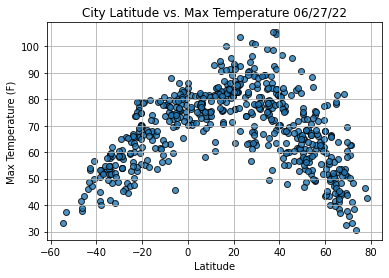

In [18]:
# import time module

import time


# build the scatterplot for latitude vs. max temps

plt.scatter(lats,
           max_temps,
            
           edgecolor='black', linewidths=1, marker='o',
            
           alpha=0.8, label='Cities')

# incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))

plt.ylabel('Max Temperature (F)')

plt.xlabel('Latitude')

plt.grid(True)


# save the figure

plt.savefig('weather_data/Fig1.png')


# show plot

plt.show()

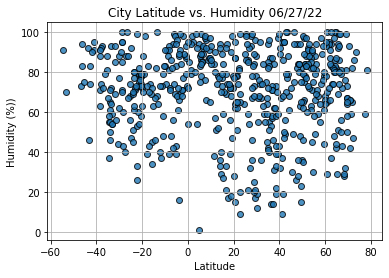

In [19]:
# import time module

import time


# build the scatterplot for latitude vs. humidity

plt.scatter(lats,
           
            humidity,
            
           edgecolor='black', linewidths=1, marker='o',
            
           alpha=0.8, label='Cities')

# incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'))

plt.ylabel('Humidity (%))')

plt.xlabel('Latitude')

plt.grid(True)


# save the figure

plt.savefig('weather_data/Fig2.png')


# show plot

plt.show()

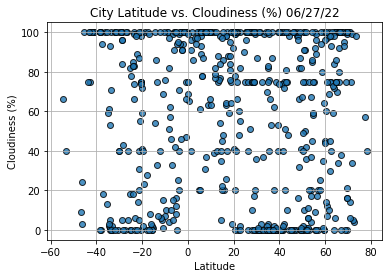

In [22]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(lats,
           
           cloudiness,
           
           edgecolor='black', linewidths=1, marker='o',
           
           alpha=0.8, label='Cities')


# incorporate the other grpah properties

plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))

plt.ylabel('Cloudiness (%)')

plt.xlabel('Latitude')

plt.grid(True)

# save the figure

plt.savefig('weather_data/Fig3.png')

# show plot

plt.show()

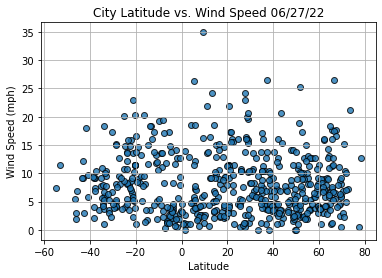

In [23]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
           
           wind_speed,
           
           edgecolor='black', linewidths=1, marker='o',
           
           alpha=0.8, label='Cities')


# incorporate the other grpah properties

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))

plt.ylabel('Wind Speed (mph)')

plt.xlabel('Latitude')

plt.grid(True)

# save the figure

plt.savefig('weather_data/Fig4.png')

# show plot

plt.show()

In [40]:
# import linregress

from scipy.stats import linregress



# create a function to create perform linear regressionn on the weather data

# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    
    # run regression on hemisphere weather data
    
    (slope, intercept, r_value, p_vale, std_err) = linregress(x_values, y_values)
    
    
    # calculate the regression line 'y values ' from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # get the equation of the line
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, 'r')
    
    # annotate the test for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)

    plt.show()
    

In [41]:
index13 = city_data_df.loc[13]

index13

City                      Mataura
Country                        NZ
Date          2022-06-27 22:04:29
Lat                      -46.1927
Lng                      168.8643
Max Temp                    37.92
Humidity                       94
Cloudiness                     24
Wind Speed                    1.9
Name: 13, dtype: object

In [42]:
# create northern and southern hemisphere dataframes

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

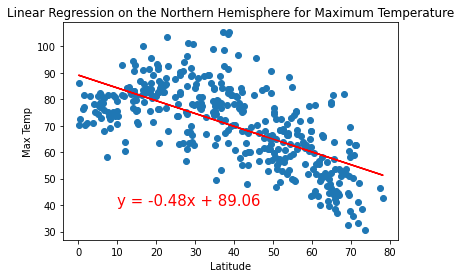

In [43]:
# linear regression on the northern hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']

# call the function

plot_linear_regression(x_values, y_values,
                       
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

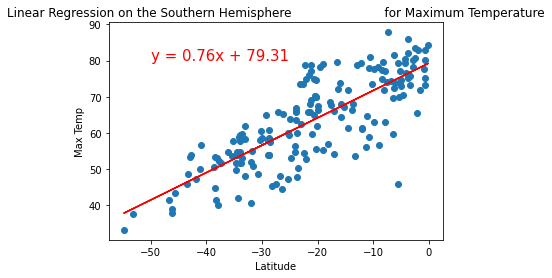

In [55]:
# linear regression on the southern hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

# call the function

plot_linear_regression(x_values, y_values,
                       
                       "Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature", "Max Temp", (-50,80))

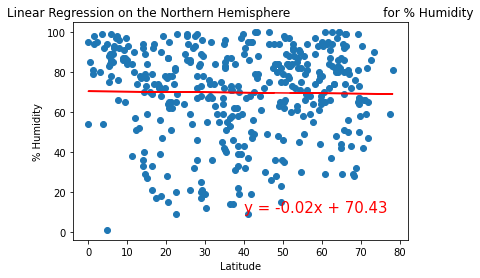

In [47]:
# linear regression on the northern hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Humidity']

# call the function

plot_linear_regression(x_values, y_values,
                       
                       "Linear Regression on the Northern Hemisphere \
                       for % Humidity", "% Humidity", (40,10))

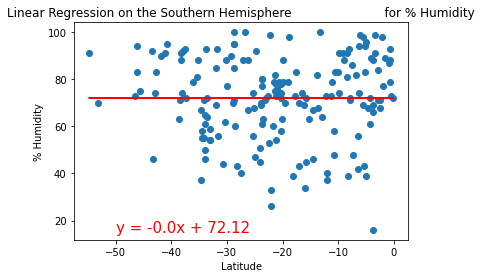

In [48]:
# linear regression on the southern hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Humidity']

# call the function

plot_linear_regression(x_values, y_values,
                       
                       "Linear Regression on the Southern Hemisphere \
                       for % Humidity", "% Humidity", (-50,15))

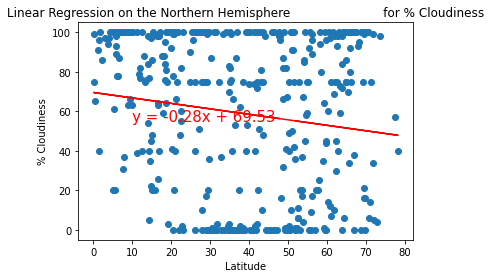

In [49]:
# linear regression on the northern hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Cloudiness']

# call the function

plot_linear_regression(x_values, y_values,
                       
                       "Linear Regression on the Northern Hemisphere \
                       for % Cloudiness", "% Cloudiness", (10,55))

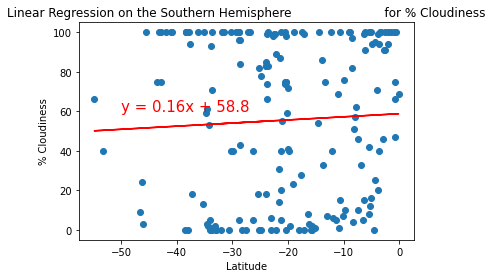

In [50]:
# linear regression on the southern hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Cloudiness']

# call the function

plot_linear_regression(x_values, y_values,
                       
                       "Linear Regression on the Southern Hemisphere \
                       for % Cloudiness", "% Cloudiness", (-50,60))

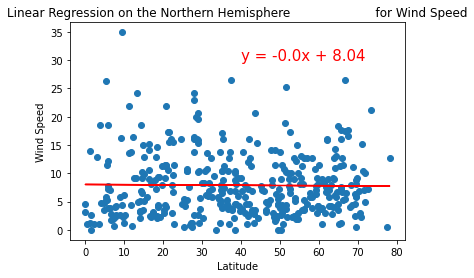

In [59]:
# linear regression on the northern hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Wind Speed']


# call the function

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Northern Hemisphere\
                      for Wind Speed', 'Wind Speed', (40,30))

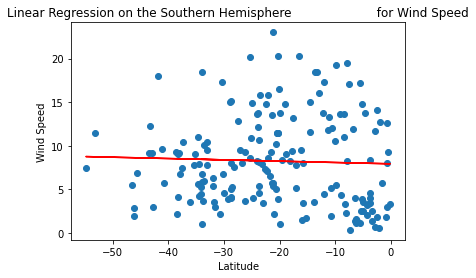

In [60]:
# linear regression on the northern hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Wind Speed']


# call the function

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Southern Hemisphere\
                      for Wind Speed', 'Wind Speed', (-50,20))